In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv(r"c:\Users\DELL\Downloads\Amazon Sale Report.csv", low_memory=False) 

df.head(10)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
5,5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,...,INR,824.00,GHAZIABAD,UTTAR PRADESH,201102.0,IN,False,NaN,NaN,NaN
6,6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,...,INR,653.00,CHANDIGARH,CHANDIGARH,160036.0,IN,False,NaN,NaN,NaN
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,...,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,False,Easy Ship,NaN,NaN
8,8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,...,NaN,NaN,HYDERABAD,TELANGANA,500008.0,IN,False,NaN,NaN,NaN
9,9,402-4393761-0311520,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XXL,Shipped,...,INR,363.00,Chennai,TAMIL NADU,600041.0,IN,False,NaN,NaN,NaN


In [3]:
# Replace all forms of missing indicators with NaN
df = df.replace(["Missing value", " ", "", "NA", "NaN"], np.nan)

# Check missing values
print("Missing values before cleaning:\n", df.isnull().sum())

# Drop rows where key fields are missing (e.g., ship-city, ship-state)
df = df.dropna(subset=["ship-city", "ship-state", "ship-postal-code", "ship-country"])

# Fill remaining missing values in less critical columns
df["fulfilled-by"].fillna("Unknown", inplace=True)
df["currency"].fillna("INR", inplace=True)
df["Date"].fillna(method='ffill', inplace=True)  # forward fill dates

print("\nMissing values after cleaning:\n", df.isnull().sum())

Missing values before cleaning:
 index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

Missing values after cleaning:
 index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                   

C:\Users\DELL\AppData\Local\Temp\ipykernel_2144\378997917.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["fulfilled-by"].fillna("Unknown", inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_2144\378997917.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [4]:
df.columns = (
    df.columns.str.strip()
    .str.replace(" ", "_")
    .str.replace("-", "_")
    .str.replace(".", "")
    .str.lower()
)

In [6]:
# Convert all city/state names to title case
df["ship_city"] = df["ship_city"].str.title()
df["ship_state"] = df["ship_state"].str.title()

# Manually fix known inconsistencies if found
df["ship_city"].replace({"Pune": "Pune", "Bengaluru": "Bangalore"}, inplace=True)
print(df["ship_state"].unique())

['Maharashtra' 'Karnataka' 'Puducherry' 'Tamil Nadu' 'Uttar Pradesh'
 'Chandigarh' 'Telangana' 'Andhra Pradesh' 'Rajasthan' 'Delhi' 'Haryana'
 'Assam' 'Jharkhand' 'Chhattisgarh' 'Odisha' 'Kerala' 'Madhya Pradesh'
 'West Bengal' 'Nagaland' 'Gujarat' 'Uttarakhand' 'Bihar'
 'Jammu & Kashmir' 'Punjab' 'Himachal Pradesh' 'Arunachal Pradesh' 'Goa'
 'Meghalaya' 'Manipur' 'Tripura' 'Ladakh' 'Dadra And Nagar' 'Sikkim'
 'Andaman & Nicobar' 'Rajshthan' 'Nl' 'Mizoram' 'New Delhi'
 'Punjab/Mohali/Zirakpur' 'Rj' 'Orissa' 'Lakshadweep' 'Pb' 'Apo' 'Ar'
 'Pondicherry' 'Rajsthan']


C:\Users\DELL\AppData\Local\Temp\ipykernel_2144\1174192787.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ship_city"].replace({"Pune": "Pune", "Bengaluru": "Bangalore"}, inplace=True)


In [7]:
# Convert date
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Convert amount to numeric
df["amount"] = pd.to_numeric(df["amount"], errors="coerce")

# Convert quantity to integer
df["qty"] = pd.to_numeric(df["qty"], errors="coerce").astype("Int64")


C:\Users\DELL\AppData\Local\Temp\ipykernel_2144\3481621114.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"], errors="coerce")


In [8]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Check for duplicate order IDs
duplicate_orders = df[df.duplicated(subset=["order_id"], keep=False)]
print("Duplicate Orders:\n", duplicate_orders)

# Drop duplicates if you decide they are invalid
df.drop_duplicates(subset=["order_id"], inplace=True)

Duplicate Orders:
          index             order_id       date   status fulfilment  \
37          37  403-4367956-2849158 2022-04-30  Shipped     Amazon   
38          38  403-4367956-2849158 2022-04-30  Shipped     Amazon   
61          61  404-2262140-4696366 2022-04-30  Shipped     Amazon   
62          62  404-2262140-4696366 2022-04-30  Shipped     Amazon   
79          79  408-4069830-3819562 2022-04-30  Shipped     Amazon   
...        ...                  ...        ...      ...        ...   
128931  128930  407-8519205-5064368 2022-05-31  Shipped     Amazon   
128942  128941  403-3035549-4142738 2022-05-31  Shipped     Amazon   
128943  128942  403-3035549-4142738 2022-05-31  Shipped     Amazon   
128953  128952  404-8878574-4524358 2022-05-31  Shipped     Amazon   
128954  128953  404-8878574-4524358 2022-05-31  Shipped     Amazon   

       sales_channel ship_service_level  category size courier_status  ...  \
37         Amazon.in          Expedited     Shirt    S        

In [9]:
print("Data shape after cleaning:", df.shape)
df.info()

Data shape after cleaning: (120201, 21)
<class 'pandas.core.frame.DataFrame'>
Index: 120201 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               120201 non-null  int64         
 1   order_id            120201 non-null  object        
 2   date                120201 non-null  datetime64[ns]
 3   status              120201 non-null  object        
 4   fulfilment          120201 non-null  object        
 5   sales_channel       120201 non-null  object        
 6   ship_service_level  120201 non-null  object        
 7   category            120201 non-null  object        
 8   size                120201 non-null  object        
 9   courier_status      120201 non-null  object        
 10  qty                 120201 non-null  Int64         
 11  currency            120201 non-null  object        
 12  amount              112808 non-null  float64       

Sales over view

In [10]:
# Ensure correct types
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["amount"] = pd.to_numeric(df["amount"], errors="coerce")
df["qty"] = pd.to_numeric(df["qty"], errors="coerce")

# Check basic stats
df[["amount", "qty"]].describe()

,amount,qty
count,112808.000000,120201.0
mean,649.849398,0.903595
std,281.460822,0.313013
min,0.000000,0.0
25%,449.000000,1.0
50%,612.000000,1.0
75%,788.000000,1.0
max,5495.000000,15.0


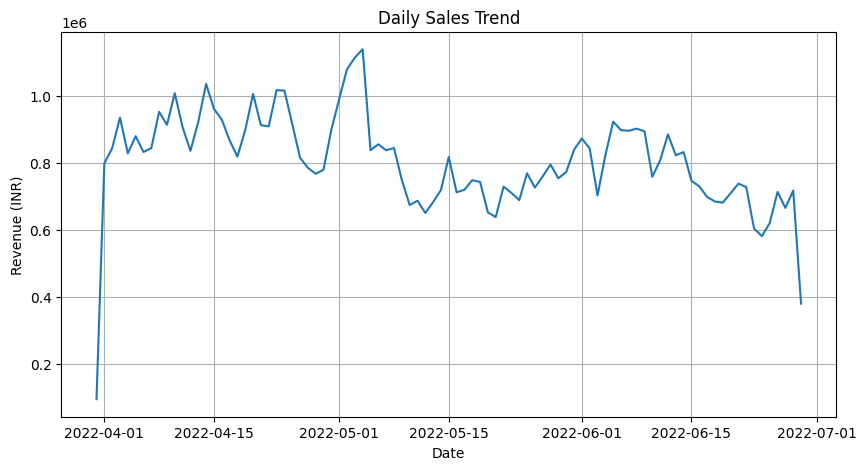

In [13]:
# Daily sales trend
daily_sales = df.groupby("date")["amount"].sum().reset_index()

plt.figure(figsize=(10,5))
plt.plot(daily_sales["date"], daily_sales["amount"])
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Revenue (INR)")
plt.grid(True)
plt.show()

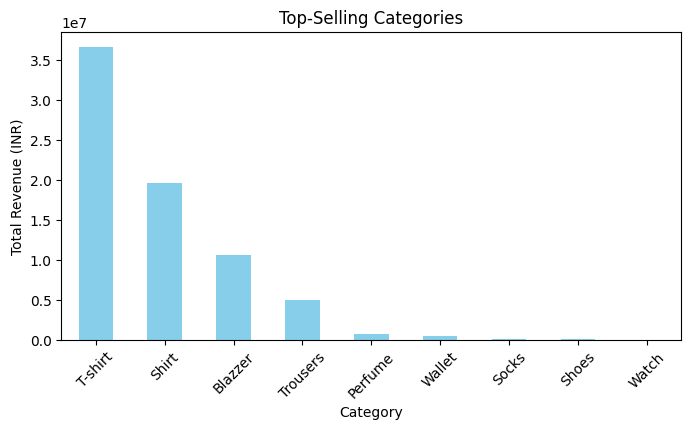

In [14]:
category_sales = df.groupby("category")["amount"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
category_sales.plot(kind="bar", color="skyblue")
plt.title("Top-Selling Categories")
plt.xlabel("Category")
plt.ylabel("Total Revenue (INR)")
plt.xticks(rotation=45)
plt.show()

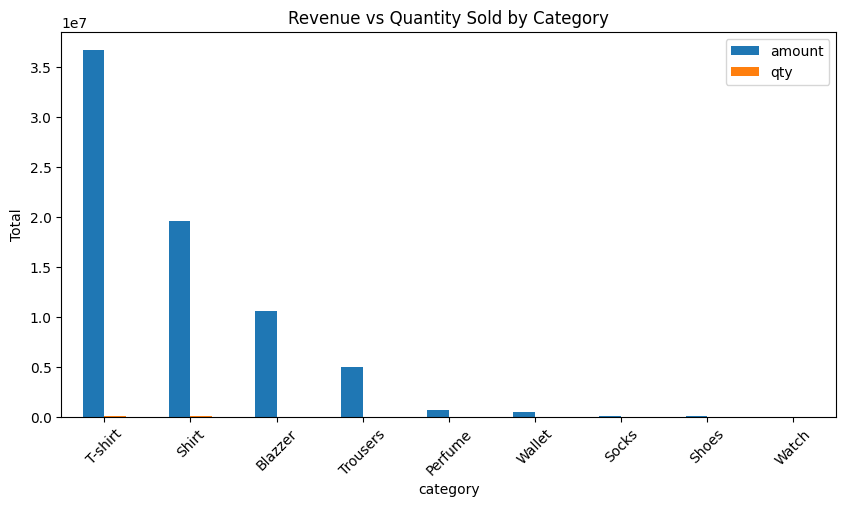

In [15]:
comparison = df.groupby("category")[["amount", "qty"]].sum().sort_values(by="amount", ascending=False)
comparison.plot(kind="bar", figsize=(10,5))
plt.title("Revenue vs Quantity Sold by Category")
plt.ylabel("Total")
plt.xticks(rotation=45)
plt.show()

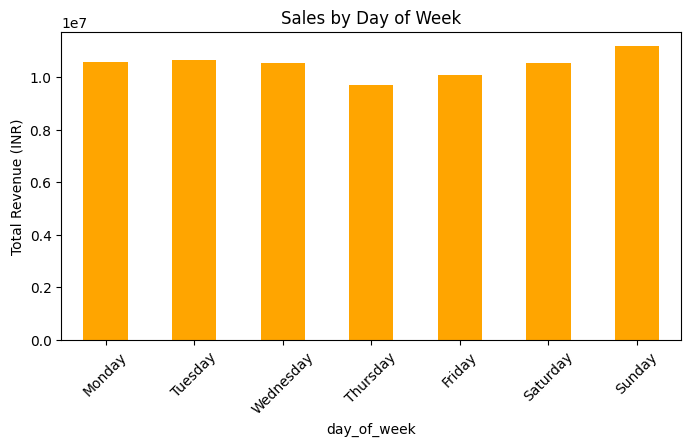

In [16]:
df["day_of_week"] = df["date"].dt.day_name()
weekly_sales = df.groupby("day_of_week")["amount"].sum().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

plt.figure(figsize=(8,4))
weekly_sales.plot(kind="bar", color="orange")
plt.title("Sales by Day of Week")
plt.ylabel("Total Revenue (INR)")
plt.xticks(rotation=45)
plt.show()

Fullfilment and channel analysis

In [17]:
# Group by Fulfillment method
fulfillment_perf = df.groupby("fulfilment").agg(
    total_revenue=("amount", "sum"),
    total_orders=("order_id", "count"),
    avg_order_value=("amount", "mean")
).reset_index()

print(fulfillment_perf)

  fulfilment  total_revenue  total_orders  avg_order_value
0     Amazon    50821337.00         83890       650.305016
1   Merchant    22486873.87         36311       648.822029


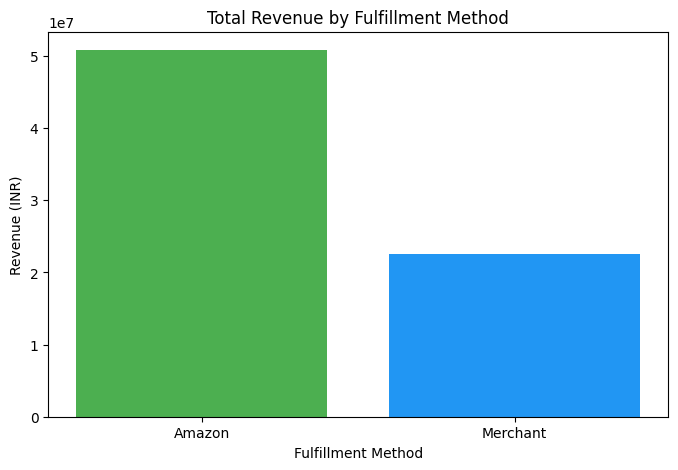

In [18]:
plt.figure(figsize=(8,5))
plt.bar(fulfillment_perf["fulfilment"], fulfillment_perf["total_revenue"], color=['#4CAF50', '#2196F3'])
plt.title("Total Revenue by Fulfillment Method")
plt.xlabel("Fulfillment Method")
plt.ylabel("Revenue (INR)")
plt.show()

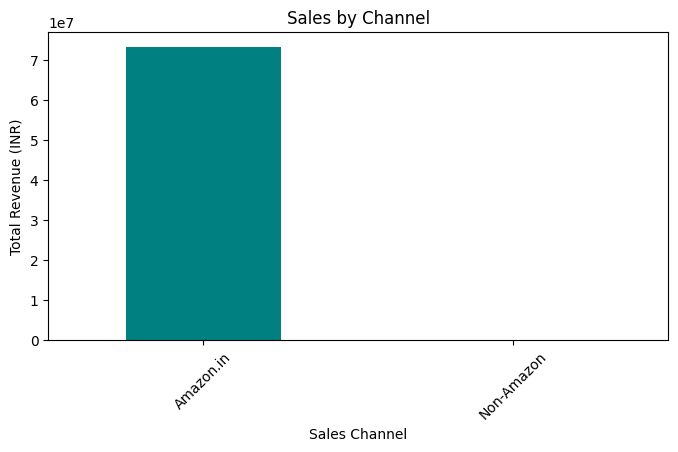

In [19]:
channel_perf = df.groupby("sales_channel")["amount"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
channel_perf.plot(kind="bar", color="teal")
plt.title("Sales by Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Total Revenue (INR)")
plt.xticks(rotation=45)
plt.show()

we can also compare shipping types:


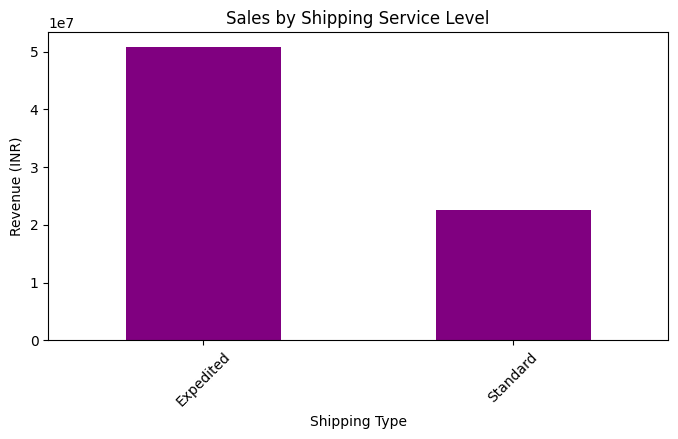

In [20]:

ship_perf = df.groupby("ship_service_level")["amount"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
ship_perf.plot(kind="bar", color="purple")
plt.title("Sales by Shipping Service Level")
plt.xlabel("Shipping Type")
plt.ylabel("Revenue (INR)")
plt.xticks(rotation=45)
plt.show()

In [22]:
# Total Orders
total_orders = len(df)

# Cancellation Rate
cancelled = df[df["status"].str.contains("Cancelled", case=False, na=False)]
cancel_rate = len(cancelled) / total_orders * 100

# Delivered Orders
delivered = df[df["status"].str.contains("Delivered", case=False, na=False)]
delivery_rate = len(delivered) / total_orders * 100

print(f"📦 Total Orders: {total_orders}")
print(f"❌ Cancellation Rate: {cancel_rate:.2f}%")
print(f"✅ Delivery Rate: {delivery_rate:.2f}%")

📦 Total Orders: 120201
❌ Cancellation Rate: 14.28%
✅ Delivery Rate: 22.06%


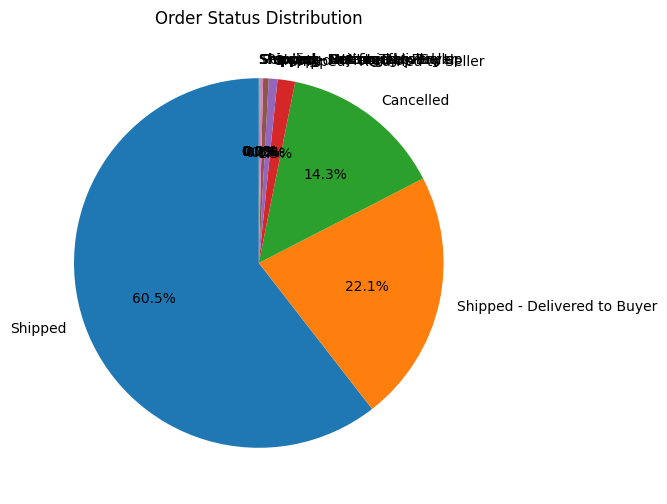

In [23]:
status_counts = df["status"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Order Status Distribution")
plt.show()

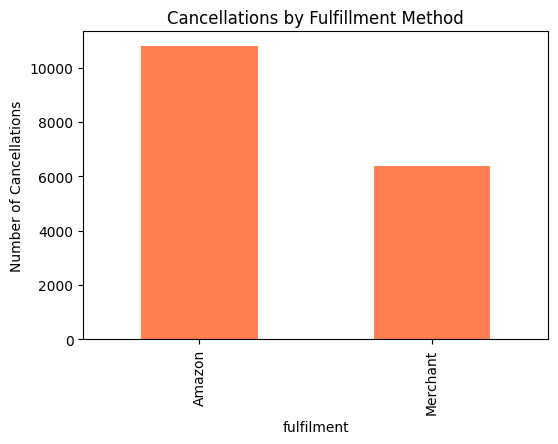

In [24]:
cancel_by_fulfillment = df[df["status"].str.contains("Cancelled", case=False, na=False)] \
                        .groupby("fulfilment")["order_id"].count()

plt.figure(figsize=(6,4))
cancel_by_fulfillment.plot(kind="bar", color="coral")
plt.title("Cancellations by Fulfillment Method")
plt.ylabel("Number of Cancellations")
plt.show()

customer and geographical insights

In [32]:
# Group by Customer ID (replace with correct column if available)
customer_summary = df.groupby("ship_city").agg(
    total_orders=("order_id", "count"),
    total_spend=("amount", "sum"),
    avg_order_value=("amount", "mean")
).reset_index()

customer_summary.head()

,ship_city,total_orders,total_spend,avg_order_value
0,(Chikmagalur Disterict). (N.R Pur Thaluku),1,389.0,389.0
1,"(Via Cuncolim)Quepem,South Goa",1,1163.0,1163.0
2,",Hyderabad",1,563.0,563.0
3,",Raibarely Road Faizabad (Ayodhya)",1,1122.0,1122.0
4,..Katra,1,641.0,641.0


In [31]:
print(df.columns.tolist())


['index', 'order_id', 'date', 'status', 'fulfilment', 'sales_channel', 'ship_service_level', 'category', 'size', 'courier_status', 'qty', 'currency', 'amount', 'ship_city', 'ship_state', 'ship_postal_code', 'ship_country', 'b2b', 'fulfilled_by', 'new', 'pendings', 'day_of_week']


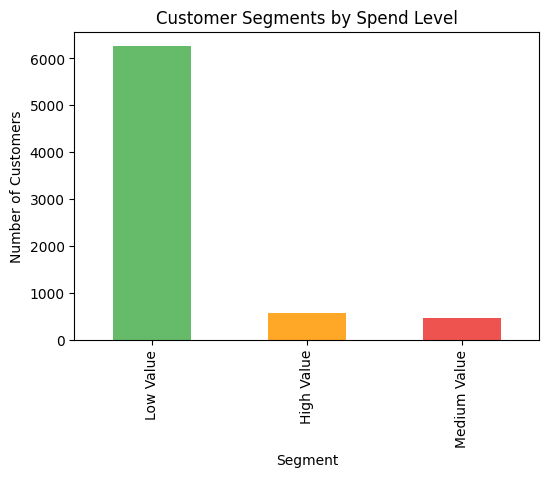

In [33]:
def segment(spend):
    if spend > 10000:
        return "High Value"
    elif spend > 5000:
        return "Medium Value"
    else:
        return "Low Value"

customer_summary["Segment"] = customer_summary["total_spend"].apply(segment)

customer_summary["Segment"].value_counts()

plt.figure(figsize=(6,4))
customer_summary["Segment"].value_counts().plot(kind="bar", color=["#66bb6a","#ffa726","#ef5350"])
plt.title("Customer Segments by Spend Level")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.show()

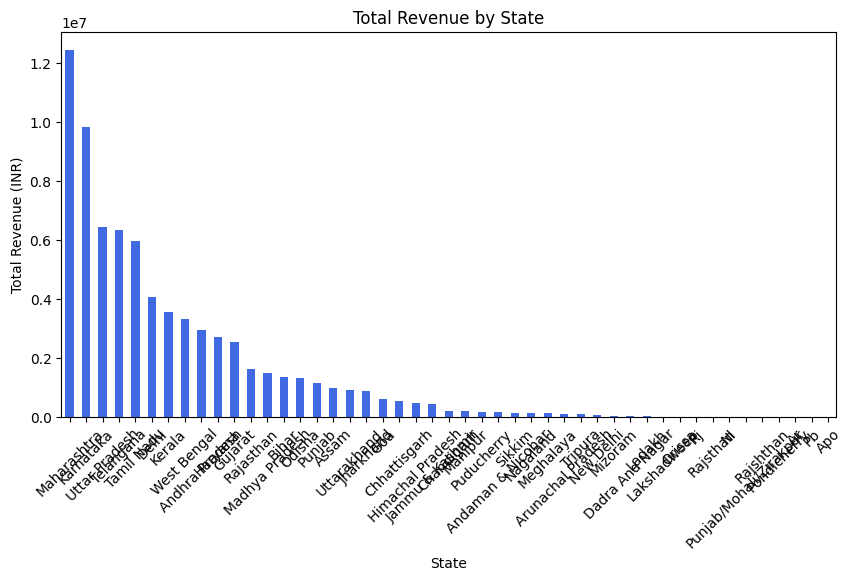

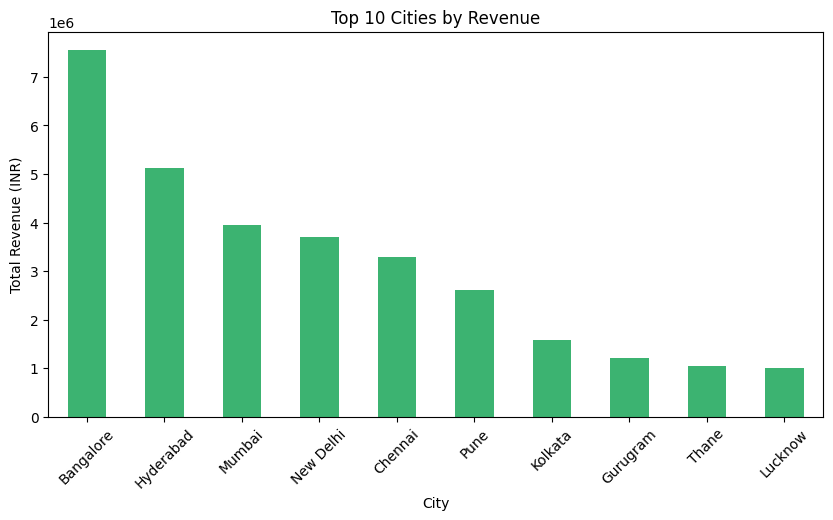

In [38]:
state_sales = df.groupby("ship_state")["amount"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
state_sales.plot(kind="bar", color="royalblue")
plt.title("Total Revenue by State")
plt.xlabel("State")
plt.ylabel("Total Revenue (INR)")
plt.xticks(rotation=45)
plt.show()

# Revenue by City
city_sales = df.groupby("ship_city")["amount"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
city_sales.plot(kind="bar", color="mediumseagreen")
plt.title("Top 10 Cities by Revenue")
plt.xlabel("City")
plt.ylabel("Total Revenue (INR)")
plt.xticks(rotation=45)
plt.show()

In [45]:
# Example: Monthly revenue by state
df["date"] = pd.to_datetime(df["date"])

monthly_state = df.groupby([pd.Grouper(key="date", freq="M"), "ship_state"])["amount"].sum().reset_index()


C:\Users\DELL\AppData\Local\Temp\ipykernel_2144\3873401367.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_state = df.groupby([pd.Grouper(key="date", freq="M"), "ship_state"])["amount"].sum().reset_index()


In [46]:
df.isnull().sum()


index                      0
order_id                   0
date                       0
status                     0
fulfilment                 0
sales_channel              0
ship_service_level         0
category                   0
size                       0
courier_status             0
qty                        0
currency                   0
amount                  7393
ship_city                  0
ship_state                 0
ship_postal_code           0
ship_country               0
b2b                        0
fulfilled_by               0
new                   120201
pendings              120201
day_of_week                0
order_date                 0
dtype: int64

In [47]:
df.duplicated().sum()

np.int64(0)

In [48]:
df = df.drop_duplicates()

In [50]:
df = df.dropna(axis=1, how='all')

In [51]:
df.to_csv("Cleaned_Amazon_Sales.csv", index=False)


In [52]:
df.head(10)

,index,order_id,date,status,fulfilment,sales_channel,ship_service_level,category,size,courier_status,...,currency,amount,ship_city,ship_state,ship_postal_code,ship_country,b2b,fulfilled_by,day_of_week,order_date
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,Mumbai,Maharashtra,400081.0,IN,False,Easy Ship,Saturday,2022-04-30
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,Bangalore,Karnataka,560085.0,IN,False,Easy Ship,Saturday,2022-04-30
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,Navi Mumbai,Maharashtra,410210.0,IN,True,Unknown,Saturday,2022-04-30
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,Puducherry,Puducherry,605008.0,IN,False,Easy Ship,Saturday,2022-04-30
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,Chennai,Tamil Nadu,600073.0,IN,False,Unknown,Saturday,2022-04-30
5,5,404-1490984-4578765,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,...,INR,824.00,Ghaziabad,Uttar Pradesh,201102.0,IN,False,Unknown,Saturday,2022-04-30
6,6,408-5748499-6859555,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,...,INR,653.00,Chandigarh,Chandigarh,160036.0,IN,False,Unknown,Saturday,2022-04-30
7,7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,...,INR,399.00,Hyderabad,Telangana,500032.0,IN,False,Easy Ship,Saturday,2022-04-30
8,8,407-5443024-5233168,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,...,INR,NaN,Hyderabad,Telangana,500008.0,IN,False,Unknown,Saturday,2022-04-30
9,9,402-4393761-0311520,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XXL,Shipped,...,INR,363.00,Chennai,Tamil Nadu,600041.0,IN,False,Unknown,Saturday,2022-04-30
